In [1]:
import numpy as np
import pandas as pd

# visualization
from matplotlib import pyplot as plt
import altair as alt
import seaborn as sns

from stimuli import generate_sequence, encode_input, Dataset
from snn_params import Params
from snn_network import SNN
from plots import plot_scores, plot_trial, plot_example_neurons         # for ploting classification accuracies

from util import load, save

In [2]:
plt.style.use('seaborn-notebook')                 # change theme to prettier one
plt.rcParams.update({'figure.figsize': (10, 8)})  # increase figure size
plt.rcParams.update({'font.size': 16})            # incrase font size

## Stimulus set

![alt text](../data/figures/12-a-x.jpg "12-A-X")

Combinatorics:
$N^{max} = \sum_{n=1}^{n=4} 2\times 9^n$

The grammar that allows $n = \{1, 2, 3, 4\}$ sentence length should generate $14,760$ unique sentences of the type $\texttt{1 AX BY CY}$

That would allow for $\sum_{n=1}^{n=4} (N^n \times (n+1)-N^n) = 129,168$ symbols

In [16]:
n1 = 2*9
n2 = 2*(9**2)
n3 = 2*(9**3)
n4 = 2*(9**4)
n_max = n1 + n2 + n3 + n4
print("Max number of utterances = {}".format(n_max))
n_sym = ((n1*2*2)-n1) + ((n2*3*2)-n2) + ((n3*4*2)-n3) + ((n4*5*2)-n4)
print("Number of symbols = {}".format(n_sym))

Max number of utterances = 14760
Number of symbols = 129168


In [3]:
train_ds = load("/project/3011085.04/snn/data/interim/train_ds.pkl")
test_ds = load("/project/3011085.04/snn/data/interim/train_ds.pkl")

Show first five sentences in the stimulus set:

In [4]:
sentences, rsp, _ = train_ds.segment(return_unique=True, reshape_back=False)
print(sentences[0:5])  # symbol sequences
print(rsp[0:5])        # responses

[list(['1', 'A', 'X', 'B', 'X', 'C', 'X']) list(['1', 'A', 'X', 'A', 'X'])
 list(['2', 'B', 'Y', 'A', 'X', 'A', 'X', 'B', 'Y'])
 list(['2', 'A', 'X', 'B', 'Y', 'A', 'X'])
 list(['2', 'A', 'X', 'B', 'Y', 'B', 'Y'])]
[list([False, False, True, False, False, False, False])
 list([False, False, True, False, True])
 list([False, False, True, False, False, False, False, False, True])
 list([False, False, False, False, True, False, False])
 list([False, False, False, False, True, False, True])]



Print only one-word sentences:

In [5]:
len1 = [s for s in sentences if len(s) < 4]
print(len1)

[['1', 'B', 'X'], ['2', 'B', 'X'], ['2', 'B', 'Y'], ['2', 'A', 'X'], ['1', 'A', 'X'], ['2', 'C', 'Z'], ['1', 'C', 'Z'], ['2', 'C', 'X'], ['1', 'B', 'Y'], ['1', 'C', 'X'], ['2', 'B', 'Z'], ['2', 'A', 'Z'], ['1', 'A', 'Y'], ['2', 'A', 'Y'], ['1', 'B', 'Z'], ['1', 'A', 'Z']]


![alt text](../data/figures/example_neurons.png "Example neurons")

![alt text](../data/figures/firing_rates.png "Firing rates")

## Response classification

In [19]:
lc_response = load("/project/3011085.04/snn/data/results/learning-curve_LR-1000.pkl")
lc_symbol = load("/project/3011085.04/snn/data/results/learning-curve_LR-symbol-100-500-1000.pkl")

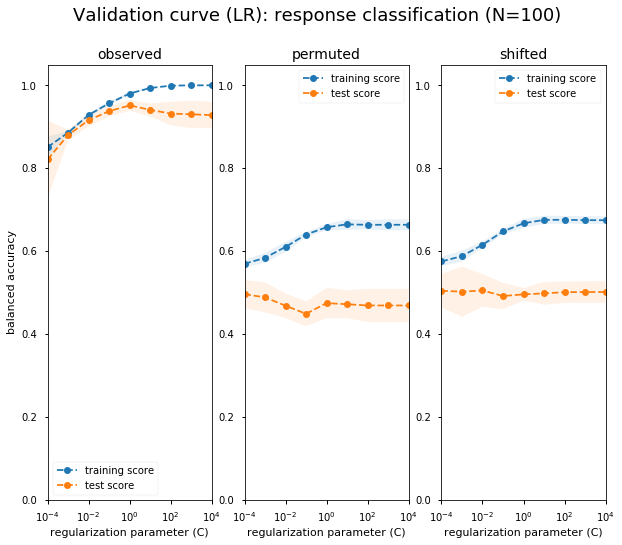

In [20]:
plot_scores(lc_response[0], title="Validation curve (LR): response classification (N=100)",
            xlabel="regularization parameter (C)", ylabel="balanced accuracy")

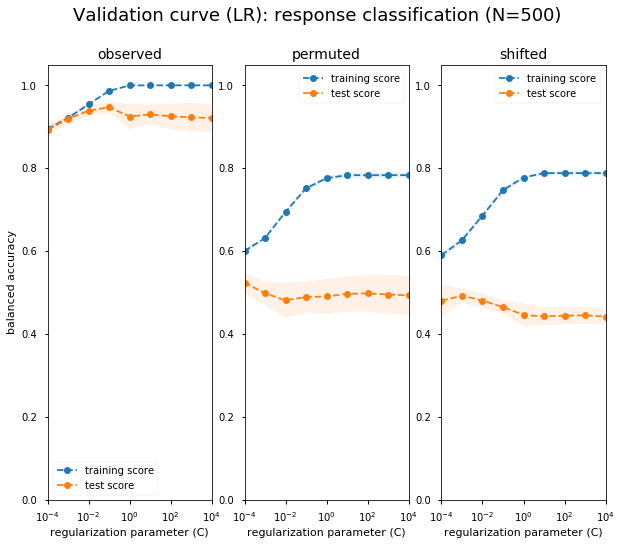

In [21]:
plot_scores(lc_response[1], title="Validation curve (LR): response classification (N=500)",
            xlabel="regularization parameter (C)", ylabel="balanced accuracy")

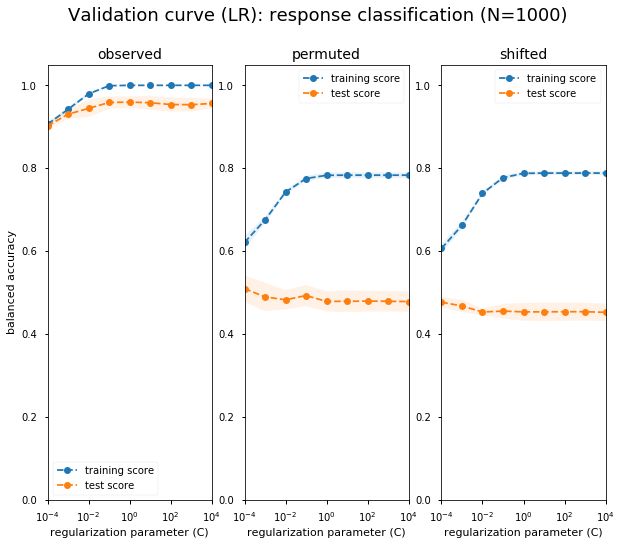

In [22]:
plot_scores(lc_response[2], title="Validation curve (LR): response classification (N=1000)",
            xlabel="regularization parameter (C)", ylabel="balanced accuracy")

## Input symbol classification

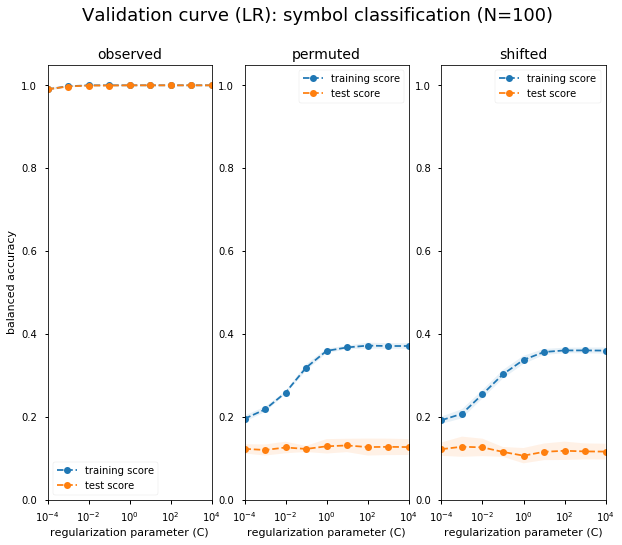

In [23]:
plot_scores(lc_symbol[0], title="Validation curve (LR): symbol classification (N=100)",
            xlabel="regularization parameter (C)", ylabel="balanced accuracy")

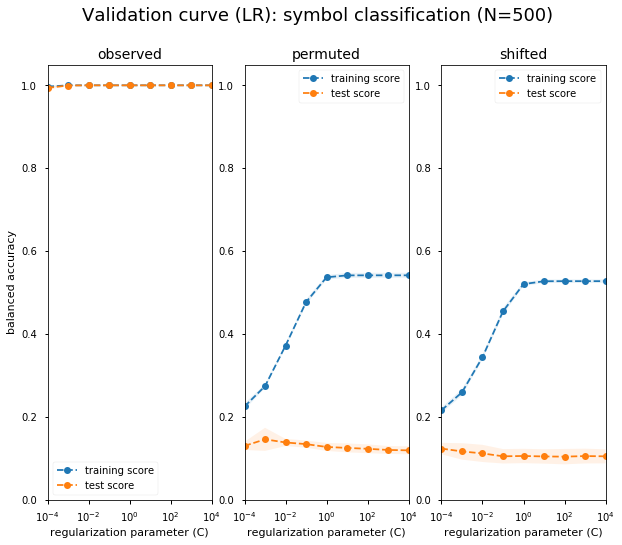

In [24]:
plot_scores(lc_symbol[1], title="Validation curve (LR): symbol classification (N=500)",
            xlabel="regularization parameter (C)", ylabel="balanced accuracy")

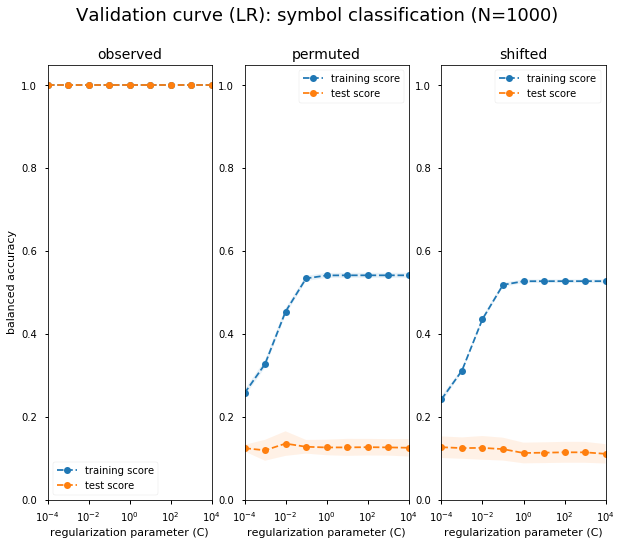

In [25]:
plot_scores(lc_symbol[2], title="Validation curve (LR): symbol classification (N=1000)",
            xlabel="regularization parameter (C)", ylabel="balanced accuracy")